# 상수, 함수 정의

In [185]:
FILE_PATH = 'dataset/PUBG.csv'

column_prefix = {
    "solo": "solo_",
    "duo": "duo_",
    "squad": "squad_"
}

headers = {
    "solo": {
        "per_game_target": [
            'solo_KillDeathRatio',
            'solo_WinRatio',
            'solo_WinTop10Ratio',
            'solo_Top10Ratio',
        ],
        "per_game_columns": [
            'solo_DamagePg',
            'solo_HeadshotKillsPg',
            'solo_HealsPg',
            'solo_KillsPg',
            'solo_MoveDistancePg',
            # 'solo_RevivesPg', # 솔로 매치는 부활 불가능
            'solo_RoadKillsPg',
            'solo_TeamKillsPg',
            'solo_TimeSurvivedPg',
            'solo_Top10sPg'
        ]
    },
    "duo": {
        "per_game_target": [
            'duo_KillDeathRatio',
            'duo_WinRatio',
            'duo_WinTop10Ratio',
            'duo_Top10Ratio',
        ],
        "per_game_columns": [
            'duo_DamagePg',
            'duo_HeadshotKillsPg',
            'duo_HealsPg',
            'duo_KillsPg',
            'duo_MoveDistancePg',
            'duo_RevivesPg',
            'duo_RoadKillsPg',
            'duo_TeamKillsPg',
            'duo_TimeSurvivedPg',
            'duo_Top10sPg'
        ]
    },
    "squad": {
        "per_game_target": [
            'squad_KillDeathRatio',
            'squad_WinRatio',
            'squad_WinTop10Ratio',
            'squad_Top10Ratio',
        ],
        "per_game_columns": [
            'squad_DamagePg',
            'squad_HeadshotKillsPg',
            'squad_HealsPg',
            'squad_KillsPg',
            'squad_MoveDistancePg',
            'squad_RevivesPg',
            'squad_RoadKillsPg',
            'squad_TeamKillsPg',
            'squad_TimeSurvivedPg',
            'squad_Top10sPg'
        ]
    }
}


In [186]:
import pandas as pd

def load_dataset(match_type):
    df = pd.read_csv(FILE_PATH)
    print(f"{FILE_PATH} successfully loadded")

    all_col_names = df.columns.tolist()
    col_names = list(filter(lambda x: x.startswith(column_prefix[match_type]), all_col_names))

    return df.loc[:, df.columns.isin(col_names)]


In [ ]:
MATCH_TYPE = 'solo'
# MATCH_TYPE = 'duo'
# MATCH_TYPE = 'squad'

# 1. 데이터 불러오기

In [188]:
df = load_dataset(MATCH_TYPE)

dataset/PUBG.csv successfully loadded


In [189]:
# 결측치 확인
print("Number of rows with missing values: ", len(df[df.isnull().any(axis=1)]))

Number of rows with missing values:  0


## 매치 유형별(Solo, Duo, Squad) 데이터 분할

# 2. 데이터 살펴보기

## 2-1. 샘플 데이터 출력

In [193]:
df.head(30)

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Revives,solo_Boosts,solo_DamageDealt,solo_DBNOs
0,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,...,27537.53,56461.84,2202.40,2764.50,304.87,33,0,29,4341.06,0
1,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,...,117837.74,165706.51,2017.38,5188.69,351.95,60,0,88,12970.39,0
2,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,...,7683.20,14023.99,1375.70,3052.50,125.76,5,0,3,1648.82,0
3,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,...,30314.83,47894.53,2197.46,3789.35,412.25,8,0,24,6015.57,0
4,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,...,22425.36,39161.77,2789.40,3737.56,307.97,12,0,21,3824.89,0
5,5.73,31.25,22003.22,16,5,0.50,10,62.5,11,2123.32,...,60352.12,91395.30,1940.20,3772.01,298.03,22,0,50,6591.15,0
6,2.45,8.45,148051.25,142,12,0.18,34,23.9,130,2604.65,...,469525.85,670638.33,1939.00,5189.78,464.37,275,0,371,40409.57,0
7,2.71,26.32,26091.14,19,5,0.50,10,52.6,14,1993.43,...,71402.04,95534.14,1270.11,3758.00,260.01,29,0,55,4529.69,0
8,3.68,13.64,49282.41,44,6,0.23,13,29.5,38,2461.78,...,98830.09,165490.88,830.48,1176.55,283.13,67,0,97,14935.28,0
9,4.17,25.00,10280.77,8,2,0.25,4,50.0,6,1550.87,...,7633.25,31283.25,3609.51,546.01,183.70,9,0,24,2979.04,0


## 2-2. 요약 정보 출력

In [194]:
df.describe()

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Revives,solo_Boosts,solo_DamageDealt,solo_DBNOs
count,87898.000000,87898.000000,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,87898.000000,...,8.789800e+04,8.789800e+04,87898.000000,87898.000000,87898.000000,87898.000000,87898.0,87898.000000,87898.000000,87898.0
mean,1.865855,5.017506,6.971571e+04,79.275342,2.080093,0.179251,12.106282,20.667335,77.195249,1768.627033,...,1.023505e+05,2.058714e+05,1514.824010,1384.556571,264.079771,110.544426,0.0,102.052094,12664.088827,0.0
std,1.776301,10.077138,8.040861e+04,96.947859,3.394513,0.217444,14.694722,16.181078,95.545156,348.721933,...,1.533403e+05,2.607638e+05,649.758824,1000.285842,125.824671,154.957248,0.0,133.393080,15596.418056,0.0
min,0.000000,0.000000,7.610000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,984.580000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,1.030000,0.000000,1.789705e+04,17.000000,0.000000,0.000000,4.000000,10.800000,16.000000,1477.232500,...,1.903947e+04,4.875226e+04,1147.880000,701.270000,191.682500,22.000000,0.0,23.000000,3495.237500,0.0
50%,1.470000,2.000000,4.517333e+04,48.000000,1.000000,0.110000,8.000000,16.700000,46.000000,1754.210000,...,5.489848e+04,1.265084e+05,1430.920000,1167.280000,258.230000,63.000000,0.0,62.000000,8387.940000,0.0
75%,2.140000,5.560000,9.246264e+04,105.000000,3.000000,0.250000,15.000000,25.900000,102.000000,2041.137500,...,1.264717e+05,2.663913e+05,1786.627500,1826.485000,329.367500,140.000000,0.0,130.000000,16186.897500,0.0
max,100.000000,100.000000,1.521200e+06,1681.000000,106.000000,1.000000,386.000000,100.000000,1673.000000,2967.090000,...,4.493014e+06,6.480220e+06,68811.950000,13854.950000,4694.110000,6341.000000,0.0,2923.000000,598378.320000,0.0


In [196]:
per_game_target = headers[MATCH_TYPE]["per_game_target"]
per_game_columns = headers[MATCH_TYPE]["per_game_columns"]

df_corr = df[per_game_target + per_game_columns].corr().loc[per_game_columns, per_game_target] # 상관 관계 행렬
df_corr

# condition = df_solo_corr >= 0.1 # 상관 관계 있는 것만 필터링
# df_solo_corr[condition]

,solo_KillDeathRatio,solo_WinRatio,solo_WinTop10Ratio,solo_Top10Ratio
solo_DamagePg,0.869319,0.610149,0.456894,0.602139
solo_HeadshotKillsPg,0.737372,0.481558,0.371495,0.419957
solo_HealsPg,0.226517,0.196385,0.127247,0.314851
solo_KillsPg,0.889437,0.635135,0.466835,0.607993
solo_MoveDistancePg,0.350892,0.376642,0.203946,0.617375
solo_RoadKillsPg,0.113038,0.089193,0.049061,0.126915
solo_TeamKillsPg,-0.016950,-0.026654,-0.024101,-0.037148
solo_TimeSurvivedPg,0.461784,0.506392,0.241249,0.805904
solo_Top10sPg,0.568376,0.618367,0.311712,0.999858


# Visualization

<AxesSubplot:>

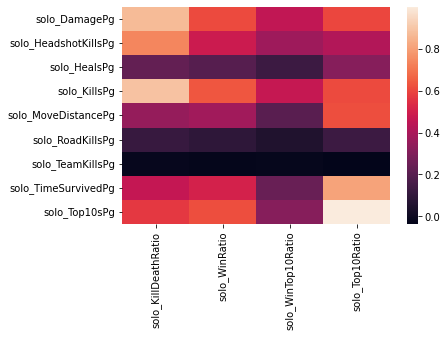

In [197]:
import seaborn as sns
sns.heatmap(df_corr)